In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
from sortedcontainers import SortedDict
import json
import glob
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
   creating: content/zero-shot-object-tracking/runs/detect/exp10/labels/
  inflating: content/zero-shot-object-tracking/runs/detect/exp10/labels/1_136.txt  
  inflating: content/zero-shot-object-tracking/runs/detect/exp10/labels/1_124.txt  
  inflating: content/zero-shot-object-tracking/runs/detect/exp10/labels/1_30.txt  
  inflating: content/zero-shot-object-tracking/runs/detect/exp10/labels/1_15.txt  
  inflating: content/zero-shot-object-tracking/runs/detect/exp10/labels/1_172.txt  
  inflating: content/zero-shot-object-tracking/runs/detect/exp10/labels/1_270.txt  
  inflating: content/zero-shot-object-tracking/runs/detect/exp10/labels/1_68.txt  
  inflating: content/zero-shot-object-tracking/runs/detect/exp10/labels/1_334.txt  
  inflating: content/zero-shot-object-tracking/runs/detect/exp10/labels/1_26.txt  
  inflating: content/zero-shot-object-tracking/runs/detect/exp10/labels/1_328.txt  
  inflating: content/zero-shot-object-tracking/runs/detect/e

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np

path = r'/content/content/zero-shot-object-tracking/runs/detect/exp10/labels'  # or unix / linux / mac path

# Get the files from the path provided in the OP
files = Path(path).glob('*.txt')  # .rglob to get subdirectories

dfs = list()
for f in files:
    data = pd.read_csv(f, header=None, names=["frame#", "object_id","x_min", "y_min", "w", "h"])
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['file'] = f.stem
    dfs.append(data)

df = pd.concat(dfs, ignore_index=True)

In [ ]:
# df["center_x"] = (df["x_min"] + df["x_max"]) / 2
# df["center_y"] = (df["y_min"] + df["y_max"]) / 2

df["center_x"] = (df["x_min"] + 0.5 * df["w"])
df["center_y"] = (df["y_min"] + 0.5 * df["h"])

df["distance_to_corner"] = np.square(df["center_x"]**2 + df["center_y"]**2)
#add distance to corner
# trd = []
# for id in df["object_id"]:
#   object_one = df.query("object_id == " + str(id)) 
#   deltax = object_one.center_x.min() - object_one.center_x.max()
#   deltay = object_one.center_y.min() - object_one.center_y.max()
#   trd.append(np.square(deltax**2 + deltay**2))



In [ ]:
df["distance_to_corner"]

0        0.086673
1        0.025022
2        0.012485
3        0.074483
4        0.402260
           ...   
41901    0.131710
41902    0.585505
41903    1.018234
41904    0.118974
41905    2.416500
Name: distance_to_corner, Length: 41906, dtype: float64

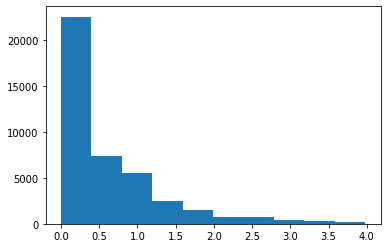

In [ ]:
plt.hist(df["distance_to_corner"])
plt.show() 

In [ ]:
df.iterrows()

<generator object DataFrame.iterrows at 0x7f7c5ab4ceb0>

In [ ]:
df["object_id"].max()

342

In [ ]:
#process on places and calculate the object dencity 
# |-----|
# |     |
# |     |
# |-----|

# x / 100
# y / 100

width = 1
height = 1

# s 100 * 100
s = 0.1

#add region feature to dataframe for regional processing
df["region"] = df.center_x // s + (df.center_y // s) * (height // s)


# object_one = df.query("object_id == 12") 
# object_one.sort_values('frame#', inplace = True)

# for index, positions in df.iterrows():
#   # plt.plot(object_one["center_x"], object_one["center_y"])        # plot x and y using default line style and color
#   print(positions.center_x // s + (positions.center_y // s) * (height / s))
#   print(positions.center_x, positions.center_y)

In [ ]:
df.region.max()

99.0

In [ ]:
df

,frame#,object_id,x_min,y_min,w,h,file,center_x,center_y,distance_to_corner,region
0,318,4,0.349062,0.356378,0.048739,0.074524,1_319,0.373432,0.393640,0.086673,30.0
1,318,9,0.345622,0.099157,0.047548,0.096502,1_319,0.369396,0.147408,0.025022,12.0
2,318,13,0.305380,0.041365,0.039719,0.071616,1_319,0.325239,0.077173,0.012485,3.0
3,318,14,0.488918,0.039846,0.055267,0.076389,1_319,0.516551,0.078040,0.074483,5.0
4,318,16,0.701115,0.278563,0.048850,0.099624,1_319,0.725541,0.328375,0.402260,34.0
...,...,...,...,...,...,...,...,...,...,...,...
41901,124,166,0.094353,0.534308,0.045382,0.113280,1_125,0.117044,0.590948,0.131710,46.0
41902,124,167,0.836253,0.150980,0.040106,0.055379,1_125,0.856306,0.178670,0.585505,17.0
41903,124,178,0.981367,0.119892,0.024557,0.055129,1_125,0.993646,0.147456,1.018234,18.0
41904,124,179,0.008854,0.536111,0.017708,0.101852,1_125,0.017708,0.587037,0.118974,45.0


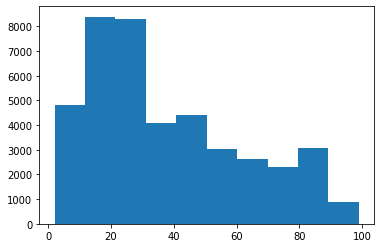

In [ ]:
region_values_for_frame = df.region.values
plt.hist(region_values_for_frame, bins =  10)
plt.show() 

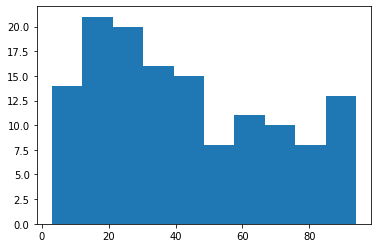

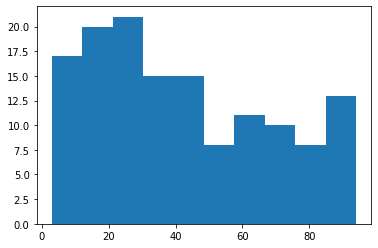

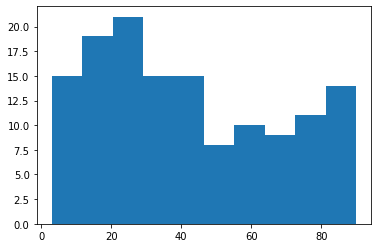

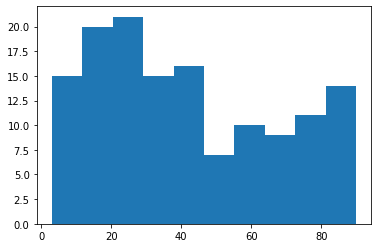

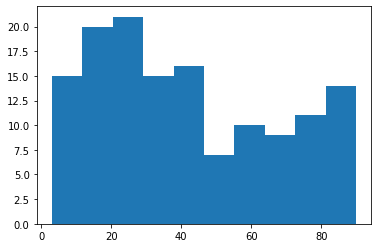

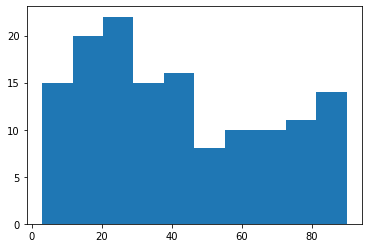

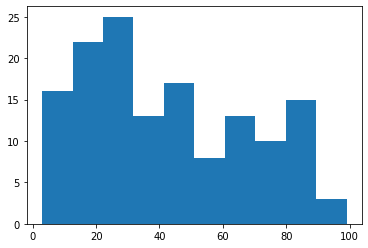

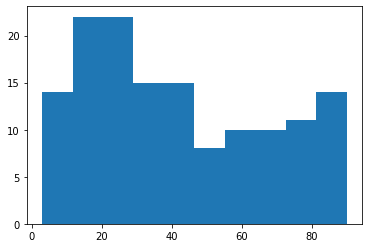

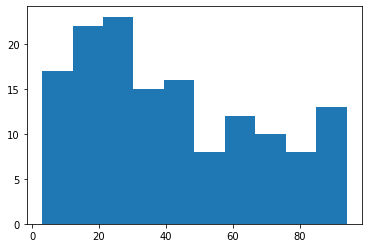

In [ ]:
for i in range(3,12):
  region_values_for_frame = df[df["frame#"] == i].region.values

  plt.hist(region_values_for_frame, bins =  10)
  plt.show() 

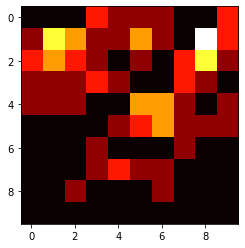

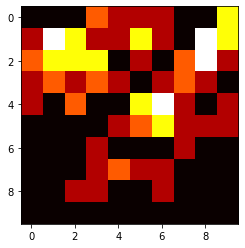

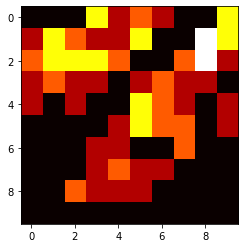

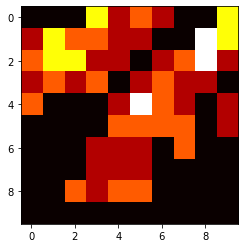

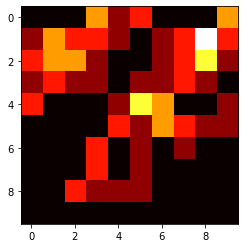

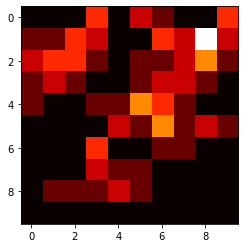

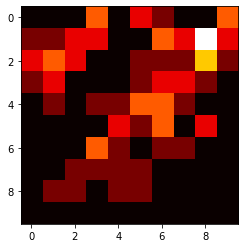

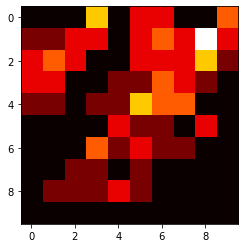

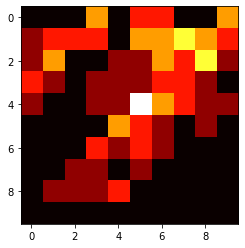

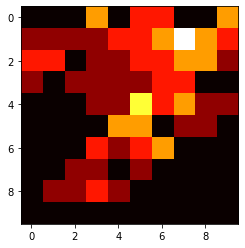

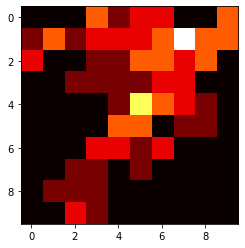

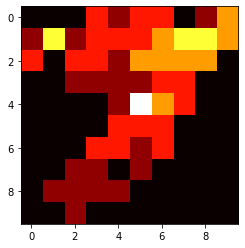

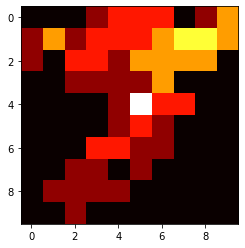

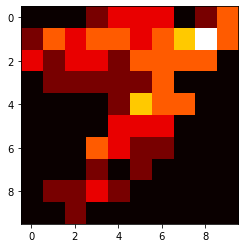

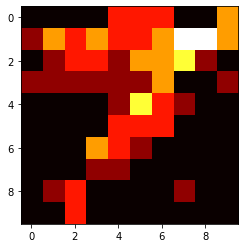

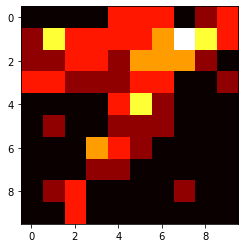

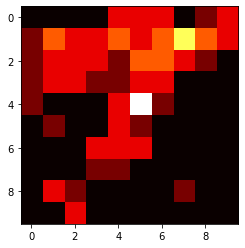

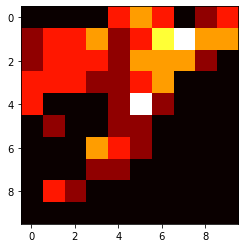

In [ ]:
for i in range(230,248):
  values_in_grid = df[df["frame#"] == i].region.values

  unique, counts = np.unique(values_in_grid, return_counts=True)
  grid_values = dict(zip(unique, counts))

  for index in range(100):
    if index not in grid_values.keys():
      grid_values[index] = 0

  grid_values = SortedDict(grid_values)

  vals = np.fromiter(grid_values.values(), dtype=float)
  vals = vals.reshape(10,10)
  plt.imshow(vals, cmap='hot', interpolation='nearest')
  plt.show()

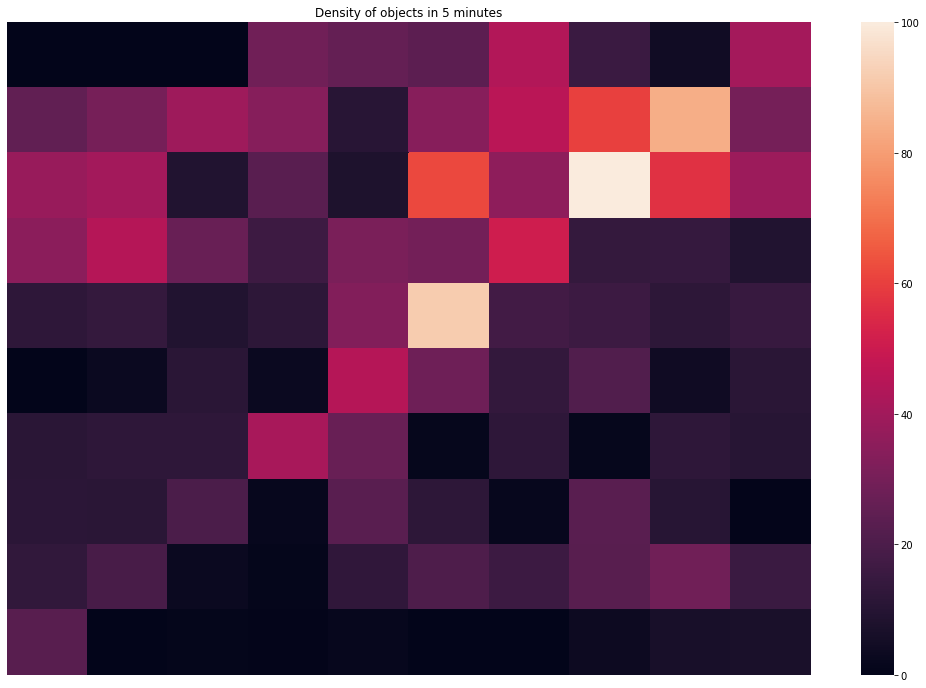

In [ ]:
values_in_grid = df.region.values

unique, counts = np.unique(values_in_grid, return_counts=True)
grid_values = dict(zip(unique, counts))

for index in range(100):
  if index not in grid_values.keys():
    grid_values[index] = 0

grid_values = SortedDict(grid_values)

vals = np.fromiter(grid_values.values(), dtype=float)
vals = vals.reshape(10,10)
# plt.imshow(vals, cmap='hot',annot=True, interpolation='nearest')
f, ax = plt.subplots(figsize=(18, 12))
# plot a heatmap with annotation
sns.heatmap((vals / np.max(vals)) * 100, annot=False, annot_kws={"size": 7}, xticklabels=False, yticklabels=False)
# fig.set_size_inches(11.03, 3.5)
plt.title("Density of objects in 5 minutes")
plt.show()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


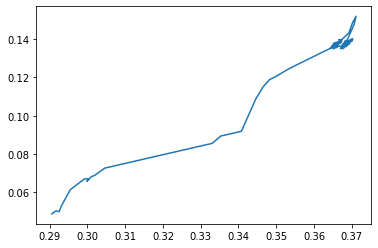

In [ ]:
object_one = df.query("object_id == 12") 
object_one.sort_values('frame#', inplace = True)
plt.plot(object_one["center_x"], object_one["center_y"])        # plot x and y using default line style and color

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

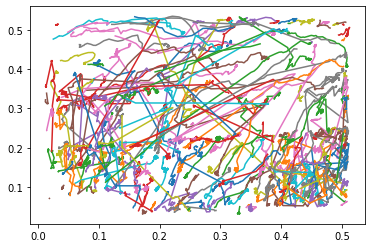

In [ ]:
for i in range(800):
  object_one = df.query("object_id == " + str(i)) 
  object_one.sort_values('frame#', inplace = True)
  plt.plot(object_one["center_x"], object_one["center_y"])        # plot x and y using default line style and color

In [ ]:
object_one = df.query("object_id == 1") 
object_one.sort_values('frame#', inplace = True)
deltax = object_one.center_x.min() - object_one.center_x.max()
deltay = object_one.center_y.min() - object_one.center_y.max()
object_one["transportation_distance"] = np.square(deltax**2 + deltay**2)


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
<ipython-input-16-d35d6310e51b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_one["transportation_distance"] = np.square(deltax**2 + deltay**2)


In [ ]:
object_one

,frame#,object_id,x_min,y_min,x_max,y_max,file,center_x,center_y,distance_to_corner,region,transportation_distance
17746,2,1,0.679427,0.071296,0.043229,0.079630,1_3,0.361328,0.075463,0.018565,3.0,0.000211
3868,3,1,0.679427,0.071296,0.043229,0.079630,1_4,0.361328,0.075463,0.018565,3.0,0.000211
41260,4,1,0.679427,0.071296,0.043229,0.079630,1_5,0.361328,0.075463,0.018565,3.0,0.000211
39091,5,1,0.679427,0.071296,0.043229,0.079630,1_6,0.361328,0.075463,0.018565,3.0,0.000211
5277,6,1,0.679792,0.071296,0.043168,0.079630,1_7,0.361480,0.075463,0.018595,3.0,0.000211
...,...,...,...,...,...,...,...,...,...,...,...,...
21514,348,1,0.831183,0.216148,0.053049,0.079679,1_349,0.442116,0.147913,0.047239,14.0,0.000211
33843,349,1,0.831057,0.216898,0.052098,0.077929,1_350,0.441578,0.147413,0.046968,14.0,0.000211
31715,350,1,0.831332,0.217169,0.051938,0.077246,1_351,0.441635,0.147207,0.046964,14.0,0.000211
4715,351,1,0.831071,0.217565,0.052268,0.077606,1_352,0.441669,0.147585,0.047025,14.0,0.000211
